# Experiment pipeline

1. load data: in Uncertainty class __init__. Instantiate an Uncertainty instance.
    - load trained model
    - for the trained model, and its validation set (w/ corresponding activations, predictions, and gt), instantiate a CulpritNeuronScore instance, for further culprit score compute
    - load query dataset activations, predictions, gt. (gt is only used for validate the methods, in query time with user, gt is unknown)


2. compute culprit matrix for a given trained model: get_culprit_matrix(), get_baseline() for random culprit comparison as baseline.
    - specify: model, culprit method
    
    
3. compute uncertain matrix given the culprit mtx, and the query data activations: get_uncertain_matrix()


4. visualize the results, compute the correlation between gt error and the uncertain mtx.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pipeline import *


%load_ext autoreload
%autoreload 2

*** actv shape (ignore dim 0 - batch size) is: [torch.Size([64, 64, 55, 55]), torch.Size([64, 192, 27, 27]), torch.Size([64, 384, 13, 13]), torch.Size([64, 256, 13, 13]), torch.Size([64, 256, 13, 13]), torch.Size([64, 4096]), torch.Size([64, 4096]), torch.Size([64, 2])] .
*** saved/query_actv/ data loaded ***
*** feature shape is torch.Size([150, 9346]).
*** actv shape (ignore dim 0 - batch size) is: [torch.Size([64, 64, 55, 55]), torch.Size([64, 192, 27, 27]), torch.Size([64, 384, 13, 13]), torch.Size([64, 256, 13, 13]), torch.Size([64, 256, 13, 13]), torch.Size([64, 4096]), torch.Size([64, 4096]), torch.Size([64, 2])] .
*** saved/val_actv/ data loaded ***
*** label size is (600,), right prediction is 459.
*** feature shape is torch.Size([600, 9346]).
[select = 0] 385
[select = 0] 815
*** select method, culprit matrix shape is: (2, 9346)


/local-scratch/weinaj/pytorch_classification_template/culprit.py:135: RuntimeWarning: divide by zero encountered in true_divide
  selectivity = np.where(np.absolute(sum_mean) >1e-5, diff_mean/sum_mean, sum_mean)
/local-scratch/weinaj/pytorch_classification_template/culprit.py:135: RuntimeWarning: invalid value encountered in true_divide
  selectivity = np.where(np.absolute(sum_mean) >1e-5, diff_mean/sum_mean, sum_mean)
/local-scratch/weinaj/anaconda3/envs/pt10/lib/python3.6/site-packages/scipy/stats/stats.py:3033: RuntimeWarning: Mean of empty slice.
  mx = x.mean()
/local-scratch/weinaj/anaconda3/envs/pt10/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/local-scratch/weinaj/anaconda3/envs/pt10/lib/python3.6/site-packages/scipy/stats/stats.py:3034: RuntimeWarning: Mean of empty slice.
  my = y.mean()
/local-scratch/weinaj/anaconda3/envs/pt10/lib/python3.6/site-packages/numpy/core/_meth

*** experiment data saved at saved/vis_mean_select_cosine_l1_0323_190924 ***


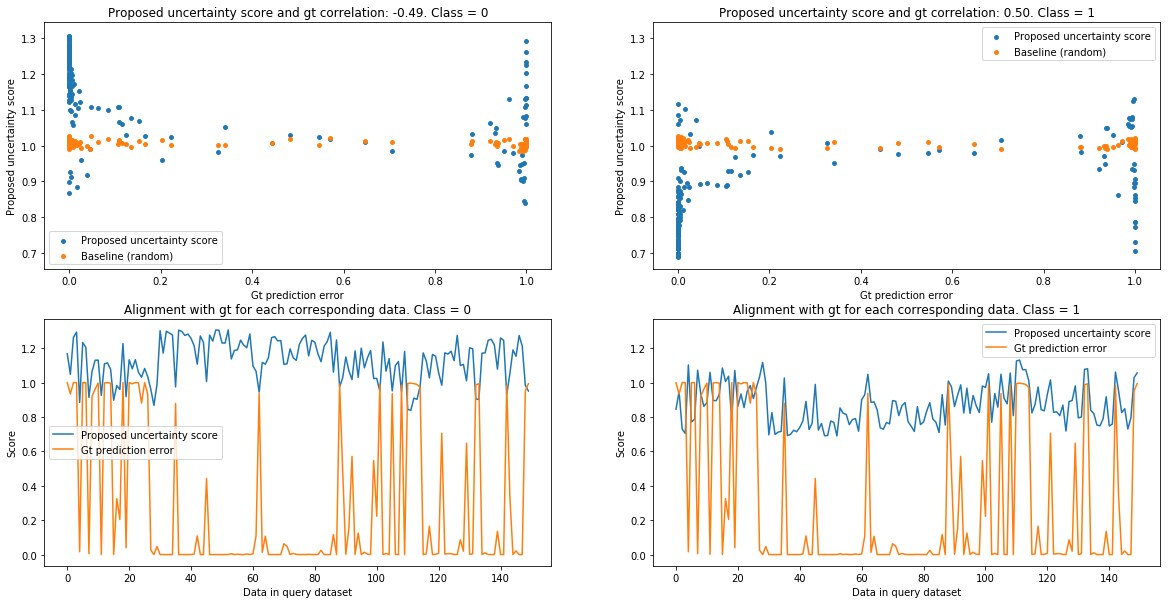

In [55]:
%run pipeline.py

In [20]:
uncty, subdir = run_experiment(experiment_variables)

*** actv shape (ignore dim 0 - batch size) is: [torch.Size([64, 64, 55, 55]), torch.Size([64, 192, 27, 27]), torch.Size([64, 384, 13, 13]), torch.Size([64, 256, 13, 13]), torch.Size([64, 256, 13, 13]), torch.Size([64, 4096]), torch.Size([64, 4096]), torch.Size([64, 2])] .
*** saved/query_actv/ data loaded ***
*** feature shape is torch.Size([150, 9346]).
*** actv shape (ignore dim 0 - batch size) is: [torch.Size([64, 64, 55, 55]), torch.Size([64, 192, 27, 27]), torch.Size([64, 384, 13, 13]), torch.Size([64, 256, 13, 13]), torch.Size([64, 256, 13, 13]), torch.Size([64, 4096]), torch.Size([64, 4096]), torch.Size([64, 2])] .
*** saved/val_actv/ data loaded ***
*** label size is (600,), right prediction is 459.
*** feature shape is torch.Size([600, 9346]).
[select = 0] 385
[select = 0] 815
*** select method, culprit matrix shape is: (2, 9346)


/local-scratch/weinaj/pytorch_classification_template/culprit.py:135: RuntimeWarning: divide by zero encountered in true_divide
  selectivity = np.where(np.absolute(sum_mean) >1e-5, diff_mean/sum_mean, sum_mean)
/local-scratch/weinaj/pytorch_classification_template/culprit.py:135: RuntimeWarning: invalid value encountered in true_divide
  selectivity = np.where(np.absolute(sum_mean) >1e-5, diff_mean/sum_mean, sum_mean)
/local-scratch/weinaj/anaconda3/envs/pt10/lib/python3.6/site-packages/scipy/stats/stats.py:3033: RuntimeWarning: Mean of empty slice.
  mx = x.mean()
/local-scratch/weinaj/anaconda3/envs/pt10/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/local-scratch/weinaj/anaconda3/envs/pt10/lib/python3.6/site-packages/scipy/stats/stats.py:3034: RuntimeWarning: Mean of empty slice.
  my = y.mean()
/local-scratch/weinaj/anaconda3/envs/pt10/lib/python3.6/site-packages/numpy/core/_meth

*** experiment data saved at saved/vis_mean_select_cosine_l1_0323_173618 ***


# use the saved data for results visualization

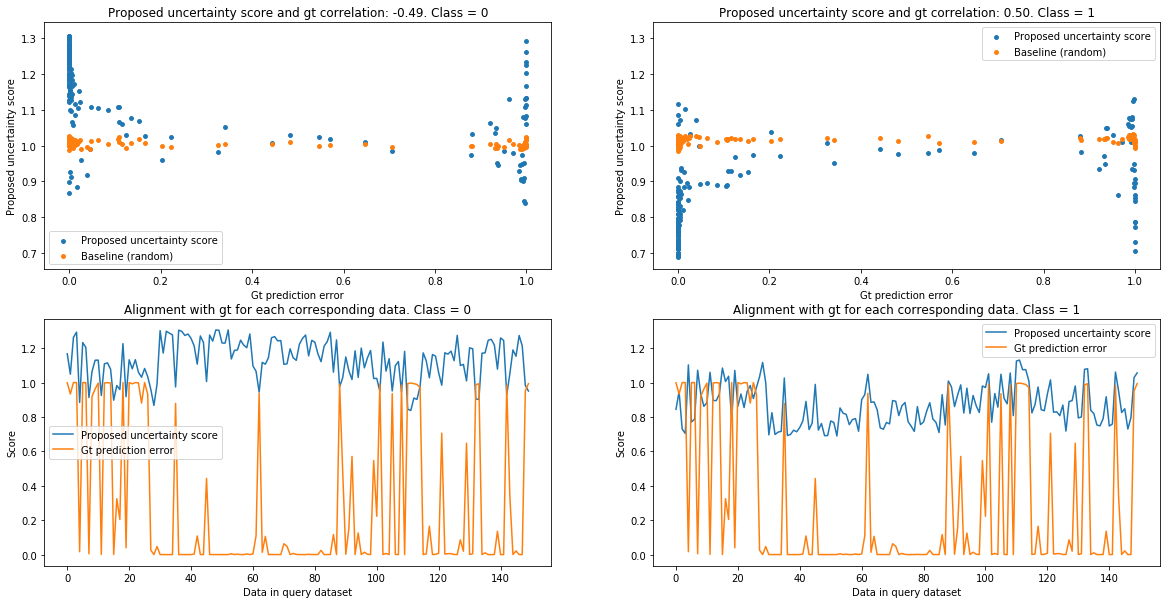

In [54]:
visualize(subdir)